# GMM - Gaussian Mixture Model (ou Modelo de Mistura Gaussiana)

## O que é ?

- Abordagem Estatística

- Descreve a mistura de várias distribuições mais simples

- As distribuições podem ser:
    - Gaussianas, de Poisson, exponenciais, entre outras.

In [1]:
# Realizando as importações necessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# Carrega o conjunto de dados
iris = datasets.load_iris()
X = iris.data

# Fit Gaussian Mixture Model
# n_components -> quantidade de agrupamentos
# random_state -> serve pra adicionar reprodutibilidade à algoritmos que envolvem randomicidade
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Cria o grid para plotar os pontos do conjunto de dados
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


## Conjunto de dados Iris

### Descrição estatística dos dados

In [2]:
# Checa as estatísticas do conjunto de dados
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Representação gráfica dos dados

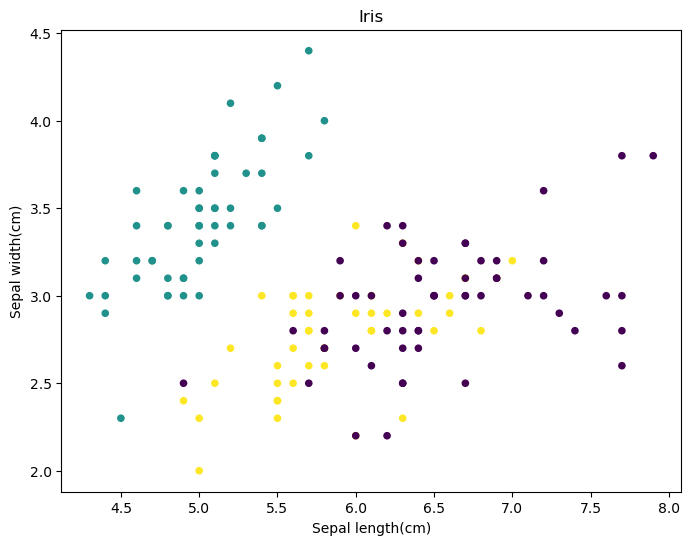

In [3]:
# Plota os pontos no grid.
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='viridis', s=20)
plt.title('Iris')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')

plt.show()

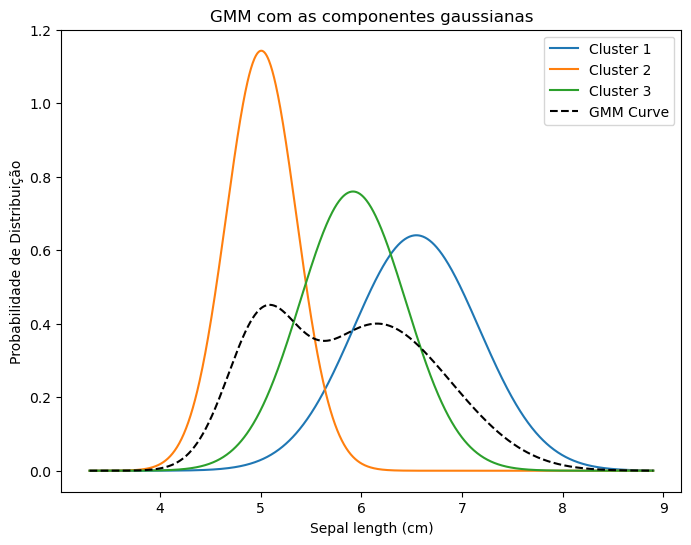

In [4]:
# Create a range of values for x-axis (Sepal length)
x_axis = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 1000)

# Plot Gaussian curves for each cluster
plt.figure(figsize=(8, 6))
for i in range(gmm.n_components):
    mean = gmm.means_[i, 0]  # Mean of Sepal length for the i-th cluster
    std_dev = np.sqrt(gmm.covariances_[i, 0, 0])  # Standard deviation of Sepal length for the i-th cluster
    plt.plot(x_axis, norm.pdf(x_axis, mean, std_dev), label=f'Cluster {i + 1}')

# Calculate and plot the Gaussian Mixture Model curve
weights = gmm.weights_
gmm_curve = np.zeros_like(x_axis)
for i in range(gmm.n_components):
    mean = gmm.means_[i, 0]
    std_dev = np.sqrt(gmm.covariances_[i, 0, 0])
    gmm_curve += weights[i] * norm.pdf(x_axis, mean, std_dev)
plt.plot(x_axis, gmm_curve, label='GMM Curve', linestyle='--', color='black')

plt.title('GMM com as componentes gaussianas')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Probabilidade de Distribuição')
plt.legend()
plt.show()


Um modelo de mistura (mixture model) é uma abordagem estatística que descreve a distribuição de dados como uma mistura de várias distribuições mais simples. Essas distribuições mais simples podem ser gaussianas, de Poisson, exponenciais, entre outras.

Em um modelo de mistura, presume-se que os dados observados são gerados por várias subpopulações ou componentes diferentes, cada uma seguindo uma distribuição de probabilidade específica. A ideia é que a distribuição de probabilidade dos dados observados seja uma combinação ponderada das distribuições dessas subpopulações.

## Aplicações

Os modelos de mistura são frequentemente usados em situações onde os dados não se encaixam perfeitamente em uma única distribuição. Algumas das principais aplicações são:

- Agrupamento de Dados

- Segmentação de Imagem

- Reconhecimento de Padrões

- Estimação de Misturas em Distribuições de Dados

- Análise de Séries Temporais

- Detecção de Anomalias

- Compressão de Dados

## Vantagens 

### Velocidade
É o algoritmo mais rápido para aprender modelos de mistura.

### Agnóstico
Como este algoritmo maximiza apenas a probabilidade, ele não distorcerá as médias para zero, nem distorcerá os tamanhos dos clusters para ter estruturas específicas que podem ou não ser aplicadas.


### Flexibilidade na Modelagem 
Por ser uma mistura de distribuições gaussianas, o GMM pode se adaptar a diferentes formas de distribuição nos dados, incluindo distribuições multimodais (com múltiplos picos) e complexas.

### Escalabilidade
GMMs podem ser escalados para grandes conjuntos de dados, tornando-os úteis em situações onde a quantidade de dados é substancial.

### Flexibilidade no Número de Componentes
O GMM permite ajustar o número de componentes (distribuições gaussianas) no modelo, o que é útil quando a quantidade de subpopulações nos dados não é conhecida a priori.

### Soft Assignment 
Em contraste com muitos métodos de cluster que realizam uma atribuição rígida dos pontos de dados a um único cluster, o GMM oferece uma atribuição "suave" ou probabilística, onde os pontos de dados podem pertencer a múltiplos clusters com diferentes graus de pertencimento.

## Desvantagens

### Singularidades:
Quando se tem pontos insuficientes por mistura, estimar as matrizes de covariância torna-se difícil, e o algoritmo é conhecido por divergir e encontrar soluções com probabilidade infinita, a menos que as covariâncias sejam regularizadas artificialmente.

### Sensibilidade à Inicialização 
O desempenho do GMM pode depender da inicialização dos parâmetros do modelo. Começar com estimativas iniciais ruins pode levar a resultados subótimos.

### Convergência para Mínimos Locais
Assim como outros algoritmos baseados em otimização, o GMM pode convergir para mínimos locais em vez do mínimo global durante a estimativa dos parâmetros.

### Computacionalmente Intensivo
O processo de treinamento do GMM, especialmente quando aplicado a grandes conjuntos de dados ou com um grande número de componentes, pode ser computacionalmente exigente.

### Assumção de Normalidade
Como o GMM usa distribuições gaussianas para modelar os dados, ele pressupõe que os dados dentro de cada componente seguem uma distribuição normal, o que pode não ser verdadeiro para todos os conjuntos de dados.

### Determinação do Número de Componentes
Encontrar o número ideal de componentes no modelo pode ser desafiador e geralmente requer métodos de validação ou heurísticas, o que pode ser subjetivo.

## Exemplo de Código

#### Covariâncias GMM

Autor: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux

Modificado por Thierry Guillemot <thierry.guillemot.work@gmail.com>

Licença: BSD 3 clause

Disponível em: [Scikit Learn](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py)

In [5]:
# Realiza as importações necessárias
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [6]:
# Define a função que irá gerar as elipses
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

In [7]:
# Define as cores que serão usadas nos gráficos
colors = ["navy", "turquoise", "darkorange"]

In [8]:
# Define o conjunto de dados
iris = datasets.load_iris()

In [9]:
# Divide o conjunto de dados em 75% para treino e 25% para testes.
skf = StratifiedKFold(n_splits=4)
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))

X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test  = iris.data[test_index]
y_test  = iris.target[test_index]

n_classes = len(np.unique(y_train))


In [10]:
# Testa diferentes tipos de covariância.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

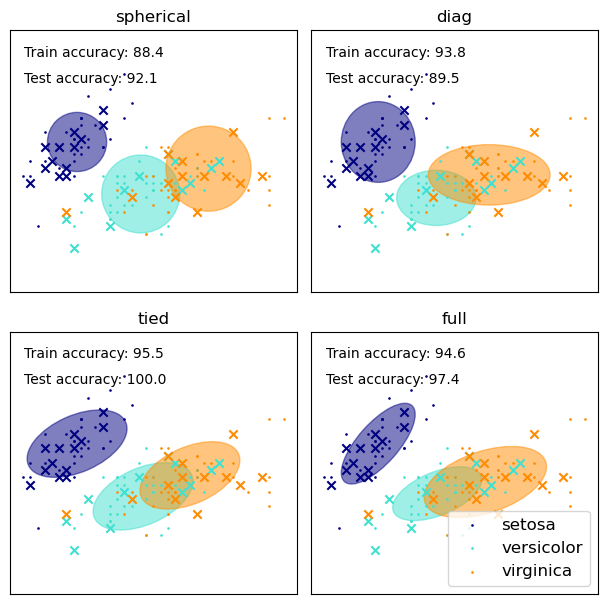

In [11]:
# Define a grade dos gráficos
n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)

for index, (name, estimator) in enumerate(estimators.items()):
    # Como as classes de treinamento estão definidas, pode-se
    # inicializar os parâmetros do GMM de forma supervisionada.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Treina os outros parâmetros usando o algoritmo de
    # maximização de expectativa ( EM - Expectation-Maximization)
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    # Plota os dados de treino.
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, 
            color=color, label=iris.target_names[n]
        )
        
    # Plota os dados de teste com X.
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(
            data[:, 0], data[:, 1], 
            marker="x", color=color
        )

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(
        0.05, 
        0.9, 
        "Train accuracy: %.1f" % train_accuracy, 
        transform=h.transAxes
    )

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(
        0.05, 
        0.8, 
        "Test accuracy: %.1f" % test_accuracy, 
        transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(
    scatterpoints=1, 
    loc="lower right", 
    prop=dict(size=12)
)

plt.show()